# Dual Recall data fitting, Sigma output

This second part just tries to look at the fits we get when letting Sigma_output move as well.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import experimentlauncher
import load_experimental_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import plots_experimental_data
import utils
%matplotlib inline

In [2]:
import bokeh as bk
import bokeh.plotting as bkplt

## Checking Dual Recall data

In [4]:
data_dualrecall = load_experimental_data.load_data_dualrecall(fit_mixture_model=True)
data_pd = data_dualrecall['panda']

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/DualRecall_Bays/em_dualrecall_allitems.pickle


## Reloading random fit_mixturemodel samples from model

Hopefully they get something interesting, let's see.

In [6]:
# %cd /Users/lmatthey/Documents/other/dbox/runs_experiments_local/dualrecall_fitmixturemodel/
%run reloader_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715.py

Reloader data generated from  generator_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715.py
Running  /nfs/data3/lmatthey/visual_working_mem/dualrecall_fitmixturemodel/reloader_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715.py
Arguments: []

        Reload outputs run with the automatic parameter generator for PBS

        Should handle random sampling of the parameter space.
    
Reloader data generated from  generator_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715.py
/nfs/data3/lmatthey/visual_working_mem/dualrecall_fitmixturemodel/generator_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715_numrepetitions3/generator_dualrecallfitmixturemodel_random_fitmixturemodel_sigmaoutputMsigmaxratio_050715_numrepetitions3-launcher_do_fit_mixturemodel_dualrecall-80e6f327-5dc2-4693-8626-9075954d4acc.npy
0.00%, -- left - 05.07 19:45
M 184.00, ratio_conj 0.78, sigmax 0.07, si

In [7]:
#### SETUP
#
# savedata = True

# dataio = DataIO(output_folder=generator_module.pbs_submission_infos['simul_out_dir'] + '/outputs/', label='global_' + dataset_infos['save_output_filename'])

#
#### /SETUP

In [8]:
# Extract data
result_em_fits = np.array(data_pbs.dict_arrays['result_em_fits']['results_flat'])
result_dist_dualrecall_angle = np.array(data_pbs.dict_arrays['result_dist_dualrecall_angle']['results_flat'])
result_dist_dualrecall_angle_emmixt_KL = np.array(data_pbs.dict_arrays['result_dist_dualrecall_angle_emmixt_KL']['results_flat'])
result_dist_dualrecall_colour = np.array(data_pbs.dict_arrays['result_dist_dualrecall_colour']['results_flat'])
result_dist_dualrecall_colour_emmixt_KL = np.array(data_pbs.dict_arrays['result_dist_dualrecall_colour_emmixt_KL']['results_flat'])

result_parameters_flat = np.array(data_pbs.dict_arrays['result_em_fits']['parameters_flat'])
all_repeats_completed = data_pbs.dict_arrays['result_em_fits']['repeats_completed']

all_args_arr = np.array(data_pbs.loaded_data['args_list'])

M_space = data_pbs.loaded_data['parameters_uniques']['M']
ratio_conj_space = data_pbs.loaded_data['parameters_uniques']['ratio_conj']
sigmax_space = data_pbs.loaded_data['parameters_uniques']['sigmax']

num_repetitions = generator_module.num_repetitions
parameter_names_sorted = data_pbs.dataset_infos['parameters']

def str_best_params(best_i, result_dist_to_use):
    return ' '.join(["%s %.4f" % (parameter_names_sorted[param_i], result_parameters_flat[best_i, param_i]) 
                     for param_i in xrange(len(parameter_names_sorted))]) + ' >> %f' % result_dist_to_use[best_i]


In [9]:
# Load ground truth
data_dualrecall = load_experimental_data.load_data_dualrecall(fit_mixture_model=True)

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/DualRecall_Bays/em_dualrecall_allitems.pickle


In [10]:
## Filter everything with repeats_completed == num_repet
filter_data = all_repeats_completed == num_repetitions - 1
result_parameters_flat = result_parameters_flat[filter_data]

result_em_fits = result_em_fits[filter_data]
result_dist_dualrecall_angle = result_dist_dualrecall_angle[filter_data]
result_dist_dualrecall_angle_emmixt_KL = result_dist_dualrecall_angle_emmixt_KL[filter_data]
result_dist_dualrecall_colour = result_dist_dualrecall_colour[filter_data]
result_dist_dualrecall_colour_emmixt_KL = result_dist_dualrecall_colour_emmixt_KL[filter_data]

all_args_arr = all_args_arr[filter_data]
all_repeats_completed = all_repeats_completed[filter_data]

print "Size post-filter: ", result_parameters_flat.shape[0]

Size post-filter:  47


In [11]:
# Compute lots of averages over the repetitions
result_em_fits_avg = utils.nanmean(result_em_fits, axis=-1)
result_dist_dualrecall_angle_avg = utils.nanmean(result_dist_dualrecall_angle, axis=-1)
result_dist_dualrecall_angle_emmixt_KL_avg = utils.nanmean(result_dist_dualrecall_angle_emmixt_KL, axis=-1)
result_dist_dualrecall_colour_avg = utils.nanmean(result_dist_dualrecall_colour, axis=-1)
result_dist_dualrecall_colour_emmixt_KL_avg = utils.nanmean(result_dist_dualrecall_colour_emmixt_KL, axis=-1)

In [12]:
result_overall_dist_dualrecall_angle_avg = np.nansum(result_dist_dualrecall_angle_avg, axis=-1)
result_overall_dist_dualrecall_colour_avg = np.nansum(result_dist_dualrecall_colour_avg, axis=-1)

In [13]:
result_overall_dist_dualrecall_angle_logsum = np.log(result_overall_dist_dualrecall_angle_avg) + result_dist_dualrecall_angle_emmixt_KL_avg
result_overall_dist_dualrecall_colour_logsum = np.log(result_overall_dist_dualrecall_colour_avg) + result_dist_dualrecall_colour_emmixt_KL_avg

In [14]:
# Get the best fitting parameters
max_best_params = 10
best_params_em_angle = np.argsort(result_overall_dist_dualrecall_angle_avg)
best_params_em_colour = np.argsort(result_overall_dist_dualrecall_colour_avg)
best_params_kl_angle = np.argsort(result_dist_dualrecall_angle_emmixt_KL_avg)
best_params_kl_colour = np.argsort(result_dist_dualrecall_colour_emmixt_KL_avg)

### Angle fits

Let's check how it looks with a 3D scatter.

In [15]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import * 

In [23]:
def do_scatter3d_plotly(datapoints, data_color):
    trace1 = Scatter3d(
            x= datapoints[:, 0],
            y= datapoints[:, 1],
            z= datapoints[:, 2],
            text= data_color,
            mode= 'markers',
            marker= Marker(
                color = data_color,
#                 size = 5,
                colorscale='Blackbody',
#                 cmin=col_min_log,
#                 cmax=col_max_log,
#                 cauto=True
            )
        )
    data = Data([trace1])
    layout = Layout(
        scene=Scene(
            xaxis=XAxis(
                title=parameter_names_sorted[0],
            ),
            yaxis=YAxis(
                title=parameter_names_sorted[1],
            ),
            zaxis=ZAxis(
                title=parameter_names_sorted[2],
            )
        )
    )
    fig = Figure(data=data, layout=layout)
    
    return fig

In [25]:
# py.iplot(do_scatter3d_plotly(result_parameters_flat, np.log(result_overall_dist_dualrecall_angle_avg)))

In [16]:
[str_best_params(best_ind, result_overall_dist_dualrecall_angle_avg) for best_ind in best_params_em_angle[:max_best_params]]

['M 131.0000 ratio_conj 0.9237 sigmax 0.1002 sigma_output 0.0592 >> 5.279864',
 'M 134.0000 ratio_conj 0.7463 sigmax 0.1211 sigma_output 0.3639 >> 6.409433',
 'M 117.0000 ratio_conj 0.6923 sigmax 0.1652 sigma_output 0.0826 >> 7.377759',
 'M 42.0000 ratio_conj 0.8571 sigmax 0.0174 sigma_output 0.4236 >> 8.182996',
 'M 184.0000 ratio_conj 0.7826 sigmax 0.0671 sigma_output 0.4677 >> 9.280769',
 'M 85.0000 ratio_conj 0.9529 sigmax 0.1341 sigma_output 0.3291 >> 11.015541',
 'M 125.0000 ratio_conj 0.9680 sigmax 0.0892 sigma_output 0.5481 >> 22.470637',
 'M 146.0000 ratio_conj 0.6849 sigmax 0.0182 sigma_output 0.6754 >> 23.243879',
 'M 55.0000 ratio_conj 0.8909 sigmax 0.0576 sigma_output 0.5876 >> 25.380422',
 'M 55.0000 ratio_conj 0.8909 sigmax 0.0807 sigma_output 0.5314 >> 29.142576']

In [17]:
weighting_power = 1.0
weighting_em = 4.
weighting_kl = 1.
weighting_sum = weighting_em + weighting_kl
weighting_em /= weighting_sum
weighting_kl /= weighting_sum

best_score = np.inf
best_param_total = -1
for param_ind in np.arange(best_params_kl_angle.size):
    curr_score = weighting_em*(np.where(best_params_em_angle == param_ind)[0][0])**weighting_power  \
                  + weighting_kl*(np.where(best_params_kl_angle == param_ind)[0][0])**weighting_power
                  
    if curr_score < best_score:
        best_param_total = best_params_kl_angle[np.where(best_params_kl_angle == param_ind)[0][0]]
        best_score = curr_score

print best_param_total, curr_score, np.where(best_params_em_angle == best_param_total)[0][0], np.where(best_params_kl_angle == best_param_total)[0][0]


46 1.4 1 3


#### BEST FIT FOR ANGLE ARE:

In [18]:
print result_em_fits_avg[best_param_total]
print str_best_params(best_param_total, result_overall_dist_dualrecall_angle_avg)
print '\n Experimental fits: \n ', '\n  '.join(["%s: %s" % (k, data_dualrecall['em_fits_angle_nitems']['mean'][6][k]) \
                                          for k in ('kappa', 'mixt_target', 'mixt_nontargets', 'mixt_random', 'train_LL', 'bic')])

[5.292247378285811 0.6229477149503482 0.3759174450038046
 0.0011348400458471867 -271.0642283277811 584.5149955879464]
M 134.0000 ratio_conj 0.7463 sigmax 0.1211 sigma_output 0.3639 >> 6.409433

 Experimental fits: 
  kappa: 7.8066772774
  mixt_target: 0.521829627402
  mixt_nontargets: 0.455046102828
  mixt_random: 0.0231242697702
  train_LL: -200.971695913
  bic: 441.624800656


### Colour fits


In [19]:
[str_best_params(best_ind, result_overall_dist_dualrecall_colour_avg) for best_ind in best_params_em_colour[:max_best_params]]

['M 35.0000 ratio_conj 0.7143 sigmax 0.0125 sigma_output 1.3528 >> 0.214502',
 'M 125.0000 ratio_conj 0.9680 sigmax 0.1452 sigma_output 0.8014 >> 0.342617',
 'M 108.0000 ratio_conj 0.9259 sigmax 0.0830 sigma_output 1.2895 >> 0.352923',
 'M 84.0000 ratio_conj 0.7619 sigmax 0.2376 sigma_output 1.2091 >> 0.369158',
 'M 42.0000 ratio_conj 0.8571 sigmax 0.2337 sigma_output 1.0287 >> 0.391737',
 'M 190.0000 ratio_conj 0.7579 sigmax 0.2876 sigma_output 1.3187 >> 0.410081',
 'M 49.0000 ratio_conj 1.0000 sigmax 0.2065 sigma_output 1.0154 >> 0.411148',
 'M 89.0000 ratio_conj 0.9101 sigmax 0.0347 sigma_output 1.0444 >> 0.424992',
 'M 170.0000 ratio_conj 0.8471 sigmax 0.4714 sigma_output 0.7621 >> 0.439038',
 'M 144.0000 ratio_conj 0.6944 sigmax 0.1977 sigma_output 1.4594 >> 0.456753']

In [26]:
weighting_power = 2.0
weighting_em = 1.
weighting_kl = 1.
weighting_sum = weighting_em + weighting_kl
weighting_em /= weighting_sum
weighting_kl /= weighting_sum

best_score = np.inf
best_param_colour_total = -1
for param_ind in np.arange(best_params_kl_colour.size):
    curr_score = weighting_em*(np.where(best_params_em_colour == param_ind)[0][0])**weighting_power  \
                  + weighting_kl*(np.where(best_params_kl_colour == param_ind)[0][0])**weighting_power
                  
    if curr_score < best_score:
        best_param_colour_total = best_params_kl_colour[np.where(best_params_kl_colour == param_ind)[0][0]]
        best_score = curr_score

print best_param_colour_total, curr_score, np.where(best_params_em_colour == best_param_colour_total)[0][0], np.where(best_params_kl_colour == best_param_colour_total)[0][0]


38 860.5 1 5


In [27]:
# py.iplot(do_scatter3d_plotly(result_parameters_flat, np.log(result_overall_dist_dualrecall_colour_avg)))

#### Best fits for colours are:

In [28]:
print result_em_fits_avg[best_param_colour_total]
print str_best_params(best_param_colour_total, result_overall_dist_dualrecall_colour_avg)

print '\n Experimental fits: \n ', '\n  '.join(["%s: %s" % (k, data_dualrecall['em_fits_colour_nitems']['mean'][6][k]) \
                                          for k in ('kappa', 'mixt_target', 'mixt_nontargets', 'mixt_random', 'train_LL', 'bic')])

[1.833019638208868 0.7036987020693521 0.2962266983119663
 7.459961868150075e-05 -317.63516470647625 677.6568683453368]
M 125.0000 ratio_conj 0.9680 sigmax 0.1452 sigma_output 0.8014 >> 0.342617

 Experimental fits: 
  kappa: 1.30075558845
  mixt_target: 0.773999666927
  mixt_nontargets: 0.181215878221
  mixt_random: 0.0447844548515
  train_LL: -237.628091566
  bic: 514.902700403


## ** => As predicted, way better than without sigma_output!! **

Now with those, we can get near way closer summary statistics fits, even though I've only run around 50 samples yet.

## Pandas + Seaborn plots


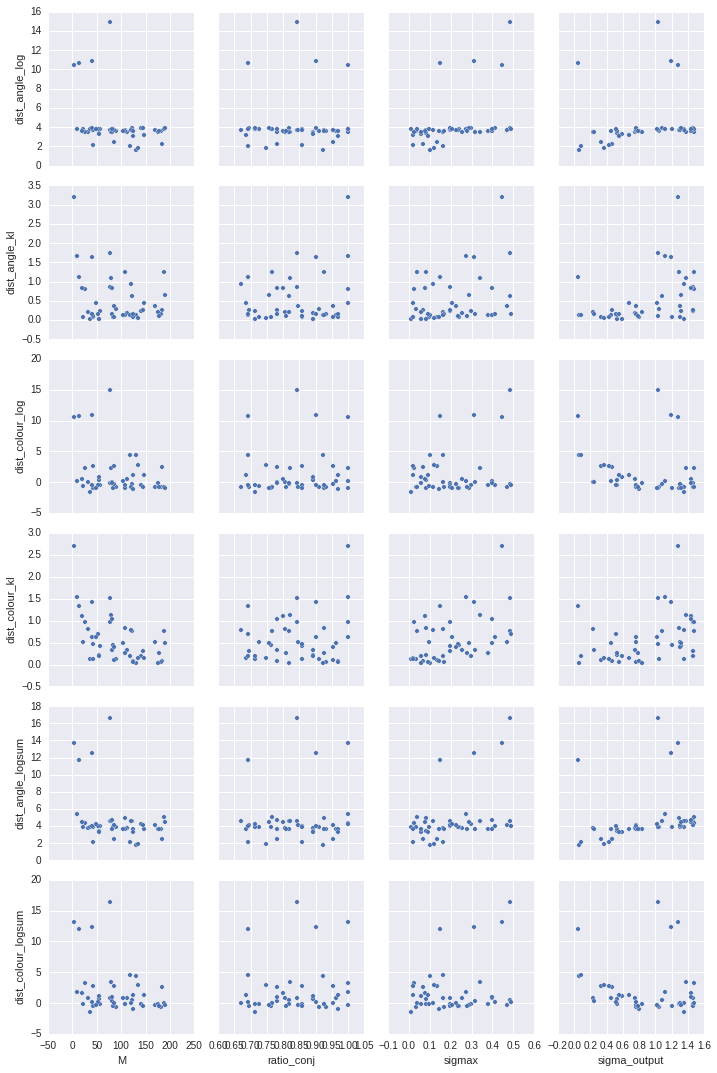

In [30]:
df_best_fits = pd.DataFrame({'M': result_parameters_flat[:, 0],
                             'ratio_conj': result_parameters_flat[:, 1],
                             'sigmax': result_parameters_flat[:, 2],
                             'sigma_output': result_parameters_flat[:, 3],
                             'dist_angle': result_overall_dist_dualrecall_angle_avg,
                             'dist_colour': result_overall_dist_dualrecall_colour_avg,
                             'dist_angle_kl': result_dist_dualrecall_angle_emmixt_KL_avg,
                             'dist_colour_kl': result_dist_dualrecall_colour_emmixt_KL_avg,
                             'dist_angle_logsum' : result_overall_dist_dualrecall_angle_logsum,
                             'dist_colour_logsum' : result_overall_dist_dualrecall_colour_logsum,
                            })
df_best_fits = df_best_fits.assign(dist_angle_log = lambda x: np.log(x['dist_angle']),
                       dist_colour_log = lambda x: np.log(x['dist_colour']))

# Now big plot of all co-scatter plots!
sns.pairplot(df_best_fits,
             x_vars=['M', 'ratio_conj', 'sigmax', 'sigma_output'],
             y_vars=['dist_angle_log', 'dist_angle_kl', 'dist_colour_log', 'dist_colour_kl', 'dist_angle_logsum', 'dist_colour_logsum']
            )

In [38]:
mycubehelix = sns.cubehelix_palette(dark=0.15, n_colors=10, start=0, rot=0.5, gamma=1.2, hue=0.9, light=0.9, reverse=True)

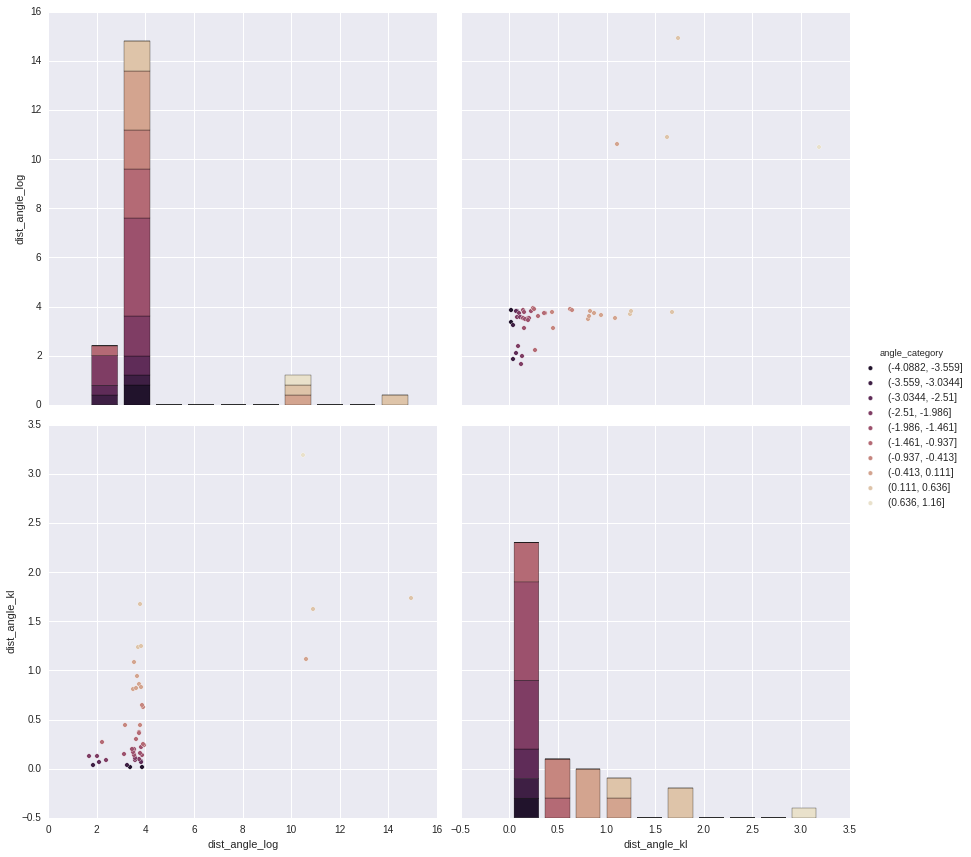

In [39]:
# Color code wrt to log(angle_kl) fit, as this seems nicely informative
sns.pairplot(df_best_fits.assign(angle_category=pd.cut(np.log(df_best_fits['dist_angle_kl']), bins=10)),
# sns.pairplot(df_best_fits.assign(angle_category=pd.cut(df_best_fits['dist_angle_logsum'], bins=10)),
             hue='angle_category',
             palette=mycubehelix,
             vars=['dist_angle_log', 'dist_angle_kl'],
             size = 6
            )

# In this plot that doesn't help much

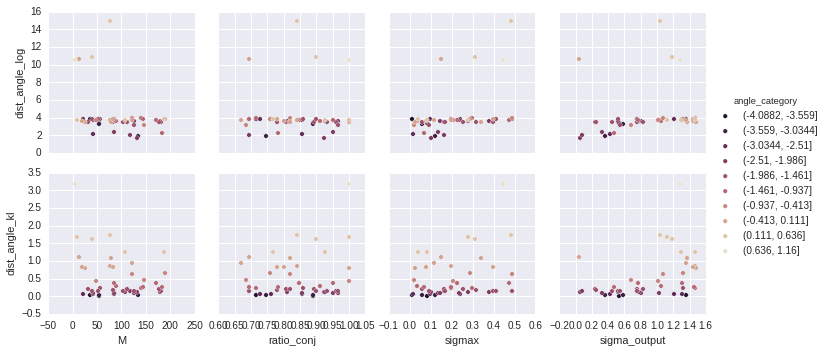

In [44]:
sns.pairplot(df_best_fits.assign(angle_category=pd.cut(np.log(df_best_fits['dist_angle_kl']), bins=10)),
             hue='angle_category',
             palette=mycubehelix,
             x_vars=['M', 'ratio_conj', 'sigmax', 'sigma_output'],
             y_vars=['dist_angle_log', 'dist_angle_kl'],
#              size = 6
            )

#### Same as before, some parameters seem to give good performance for both metrics.

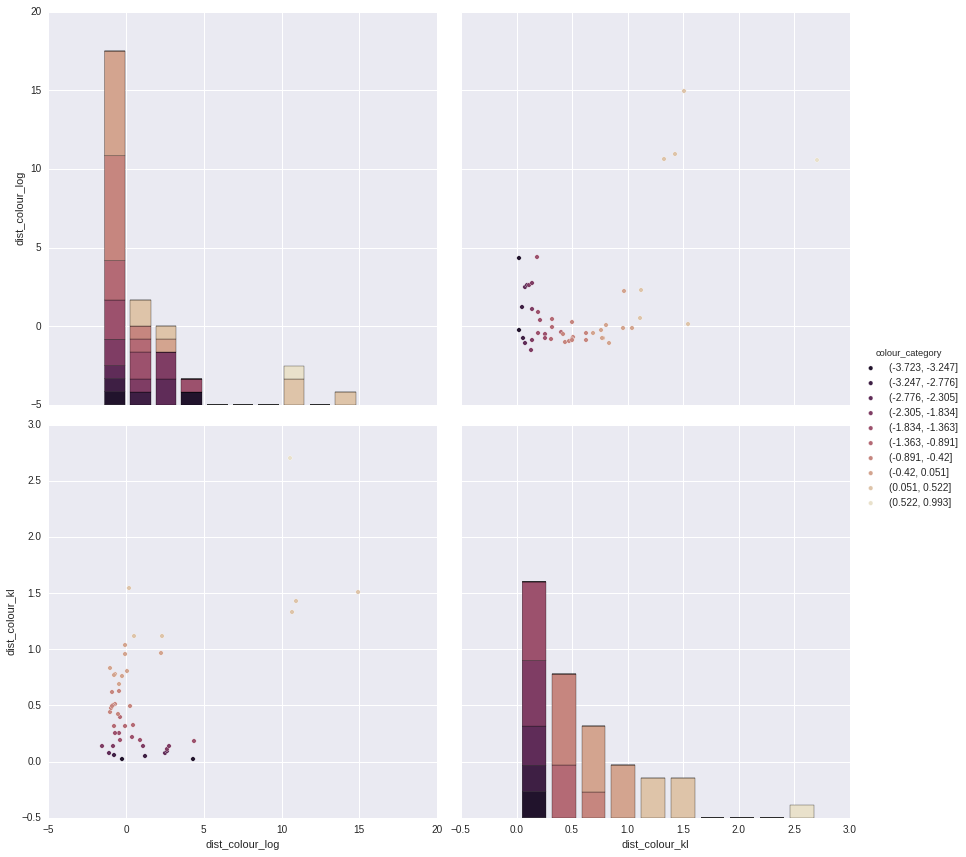

In [45]:
# Color code for Colour KL fit this time 
sns.pairplot(df_best_fits.assign(colour_category=pd.cut(np.log(df_best_fits['dist_colour_kl']), bins=10)),
             hue='colour_category',
             palette=mycubehelix,
             vars=['dist_colour_log', 'dist_colour_kl'],
             size = 6
            )

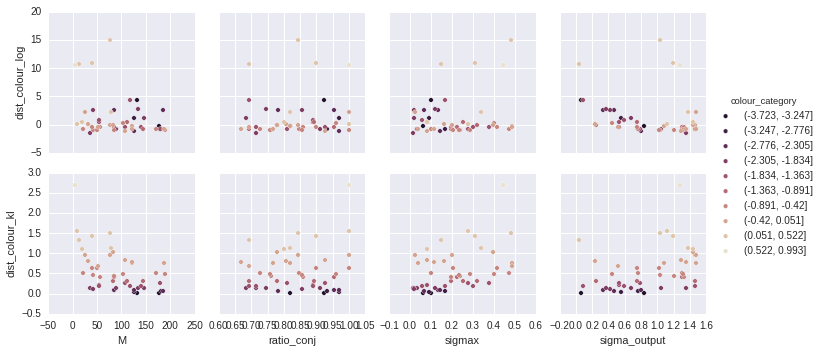

In [46]:
sns.pairplot(df_best_fits.assign(colour_category=pd.cut(np.log(df_best_fits['dist_colour_kl']), bins=10)),
             hue='colour_category',
             palette=mycubehelix,
             x_vars=['M', 'ratio_conj', 'sigmax', 'sigma_output'],
             y_vars=['dist_colour_log', 'dist_colour_kl'],
#              size = 6
            )

### And here we see finally we have broken this bad anti-correlation between the two metrics. 

Some parameters with sigma_output > 0 give good performance.
Let's wait and see how well we can fit it.

We will then need to check if one value of sigma_output could fit both colours and angles...
